In [1]:
from ImageLoader import *
from NoiseRemoval import *
from Segmentation import *
from OrientationDetector import *
from LineCutter import *
from WordCutter import *
from CharCutter import *
from FeatureExtractor import *
from Classifier import *
from Preprocessing import *
import numpy as np
# plt.rc("figure", dpi=1000)

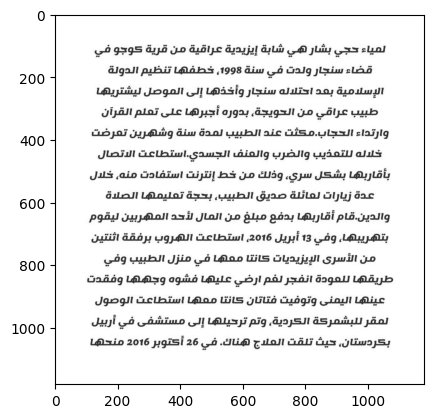

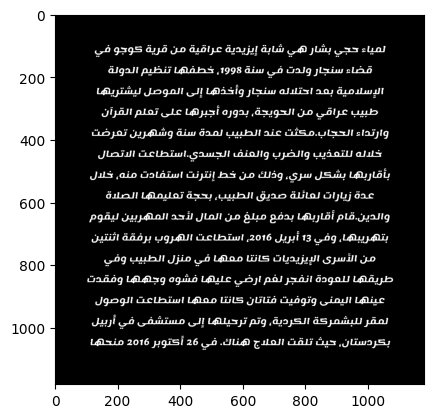

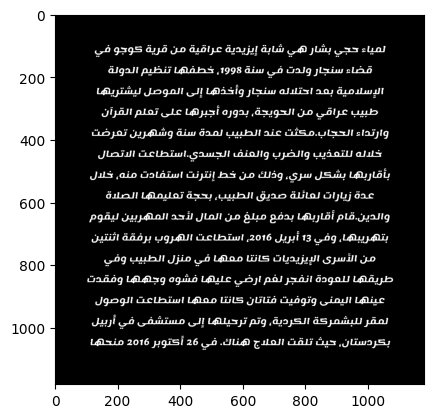

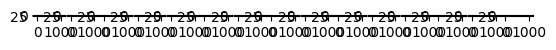

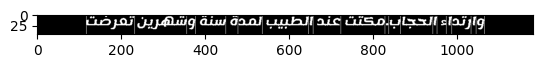

7.75 8.555555555555555
[117, 232, 377, 449, 536, 657, 723, 952, 1065]


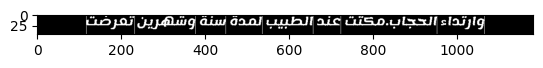

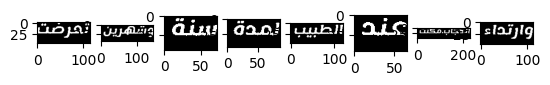

In [2]:
path = ".\\fonts-dataset\\2\\"
image = ImageLoader.loadImage(path,"1.jpeg")
alteredImage=image
ImageLoader.print(alteredImage)
# alteredImage = NoiseRemoval.applyGaussianBlur(image=image)
# ImageLoader.print(alteredImage,sep=False)
# alteredImage = NoiseRemoval.sharpenImage(alteredImage)
alteredImage = Segmentation.segment(alteredImage)
ImageLoader.print(alteredImage)
alteredImage = OrientationDetector.rotate(alteredImage)
ImageLoader.print(alteredImage)
alteredImage = LineCutter.extractLines(alteredImage)
ImageLoader.print(alteredImage)
alteredImage = WordCutter.extractWords(alteredImage[4])
#alteredImage = CharCutter.extractCharacters(alteredImage)
# cv2.imshow("",alteredImage[0])
# cv2.waitKey(0)
#print(alteredImage)
ImageLoader.print(alteredImage)
for i in range(0,len(alteredImage)):
    alteredImage[i] = alteredImage[i].tolist()

In [3]:
#ImageLoader.print(alteredImage)
alteredImage2 = CharCutter.extractCharacters(alteredImage)
# for ii in alteredImage2:
#     for jj in ii:
        # print(jj.StartIndex,jj.CutIndex,jj.EndIndex)
# print(alteredImage2)
#ImageLoader.print(alteredImage2,sep=True)



# ImageLoader.print(alteredImage2)
# lll = [[[1,2,3],[4,5,6],[7,8,9]],[[10,11,12],[13,14,15],[16,17,18]]]
# print(lll)

9
[15]
9
0
End: 5
Start: 21
End Pixel: 255
Start Pixel: 255
1
End: 25
Start: 35
End Pixel: 255
Start Pixel: 255
2
End: 37
Start: 41
End Pixel: 255
Start Pixel: 255
3
End: 43
Start: 54
End Pixel: 255
Start Pixel: 255
4
End: 57
Start: 68
End Pixel: 255
Start Pixel: 255
5
End: 72
Start: 82
End Pixel: 255
Start Pixel: 255
6
End: 84
Start: 93
End Pixel: 255
Start Pixel: 255
7
End: 96
Start: 107
End Pixel: 255
Start Pixel: 255
Valid Separation regions for word 0 : 
S length: 9
V length: 5
14
[15, 22]
14
1
End: 11
Start: 24
End Pixel: 255
Start Pixel: 255
2
End: 27
Start: 39
End Pixel: 255
Start Pixel: 255
3
End: 41
Start: 53
End Pixel: 255
Start Pixel: 255
4
End: 56
Start: 65
End Pixel: 255
Start Pixel: 255
5
End: 68
Start: 72
End Pixel: 255
Start Pixel: 255
6
End: 75
Start: 79
End Pixel: 255
Start Pixel: 255
7
End: 82
Start: 89
End Pixel: 255
Start Pixel: 255
8
End: 91
Start: 101
End Pixel: 255
Start Pixel: 255
9
End: 104
Start: 110
End Pixel: 255
Start Pixel: 255
10
End: 113
Start: 119
End

In [4]:
feature_extractor = FeatureExtractor()
feature_extractor.loadDataset(".\\fonts-dataset\\")
print("Loading DataSet Done")
features,labels = feature_extractor.extract(method = 'SIFT')
classifier = Classifier()

print(len(features))
print(len(labels))

classifier.train(features,labels)

Loading DataSet Done
Kmeans start
Kmeans Done
400
400


In [10]:
path = ".\\fonts-dataset\\1\\"
images = ImageLoader.loadImages(path)
cnt = 0
for image in images:
    result = classifier.classify(image,feature_extractor,method='SIFT')
    if result == '1':
        cnt+=1

print(str(cnt/len(images)*100) + "%")
# ImageLoader.print(Preprocessing.crop_to_fit_white_with_border(alteredImage2[1]))
# print(result)

82.39999999999999%


3


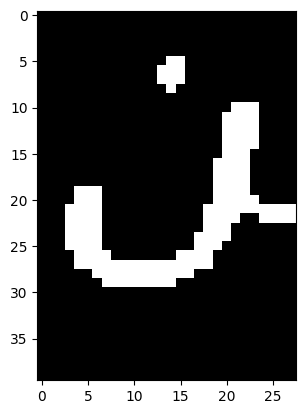

In [7]:
result = classifier.classify(Preprocessing.crop_to_fit_white_with_border(alteredImage2[6]),feature_extractor,method='SIFT')
print(result)
ImageLoader.print(Preprocessing.crop_to_fit_white_with_border(alteredImage2[6]))
# ImageLoader.print(Preprocessing.crop_to_fit_white_with_border(alteredImage2[1]))
# print(result)